In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
"""
    Global variables.
    DATA_DIR -> the directory where the files are
    DATA_FILE -> the name of the file
"""
DATA_DIR = 'F:/Python/Time Series - Airbnb/data/'
DATA_FILE = 'data_for_prediction.csv'

In [3]:
data = pd.read_csv(DATA_DIR+DATA_FILE)
display(data.head())

,ds,ts,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff,trend,seasonal,resid
0,2010-07-04,1.0,0.000000,0.198042,1.285714,-0.693147,-0.285714,-0.198042,0.000000,0.000000,NaN,0.001257,NaN
1,2010-07-05,1.0,0.000000,0.099021,1.142857,0.000000,-0.142857,-0.099021,0.000000,0.000000,NaN,0.075568,NaN
2,2010-07-06,1.0,0.000000,0.099021,1.142857,0.000000,-0.142857,-0.099021,0.000000,0.000000,NaN,0.056422,NaN
3,2010-07-16,2.0,0.693147,0.594126,1.857143,0.000000,0.142857,0.099021,0.199809,0.493339,NaN,0.024812,NaN
4,2010-07-28,1.0,0.000000,0.255966,1.428571,0.000000,-0.428571,-0.255966,0.151569,-0.151569,NaN,-0.030235,NaN


In [7]:
from fbprophet import Prophet
from datetime import datetime

In [8]:
def days_between(d1,d2):
    d1 = datetime.strptime(d1,'%Y-%m-%d')
    d2 = datetime.strptime(d2,'%Y-%m-%d')
    return abs((d1-d2).days+1)

In [11]:
data_column = 'ds'
metric_column = 'ts'
table = data
start_training_date = '2010-07-03'
end_training_date = '2018-09-08'
start_forecasting_date = '2018-09-09'
end_forecasting_date = '2018-12-31'
year_to_estimate = '2018'

future_num_points = days_between(start_forecasting_date, end_forecasting_date)

cap = None

growth = 'linear'

n_changepoints = 25

changepoint_prior_scale = 0.05

changepoints = None

holidays_prior_scale = 10

interval_width = 0.8

mcmc_samples = 0

holidays = None

daily_seasonality = True

In [24]:
df_prophet = data.loc[:,['ts','ds']]
df_prophet.rename(columns={'ds':'ds','ts':'y'},inplace=True)
df_prophet['ds']= pd.to_datetime(df_prophet['ds'])
df_prophet['y'] = pd.to_numeric(df_prophet['y'],errors='ignore')

In [27]:
def create_daily_forecast(df,
#                           cap,
                          holidays,
                          growth,
                          n_changepoints = 25,
                          changepoint_prior_scale = 0.05,
                          changepoints = None,
                          holidays_prior_scale = 10,
                          interval_width = 0.8,
                          mcmc_samples = 1,
                          future_num_points = 10, 
                          daily_seasonality = True):
    
        # Create copy of dataframe
        df_ = df.copy()

        # Create model object and fit to dataframe
        m = Prophet(growth = growth,
                  n_changepoints = n_changepoints,
                  changepoint_prior_scale = changepoint_prior_scale,
                  changepoints = changepoints,
                  holidays = holidays,
                  holidays_prior_scale = holidays_prior_scale,
                  interval_width = interval_width,
                  mcmc_samples = mcmc_samples, 
                  daily_seasonality = daily_seasonality)

        # Fit model with dataframe
        m.fit(df_)

        # Create dataframe for predictions
        future = m.make_future_dataframe(periods = future_num_points)
        #     future['cap'] = max(df_['y']) if cap is None else cap

        # Create predictions
        fcst = m.predict(future)

        # Plot
        m.plot(fcst);
        m.plot_components(fcst)

        return fcst

E:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



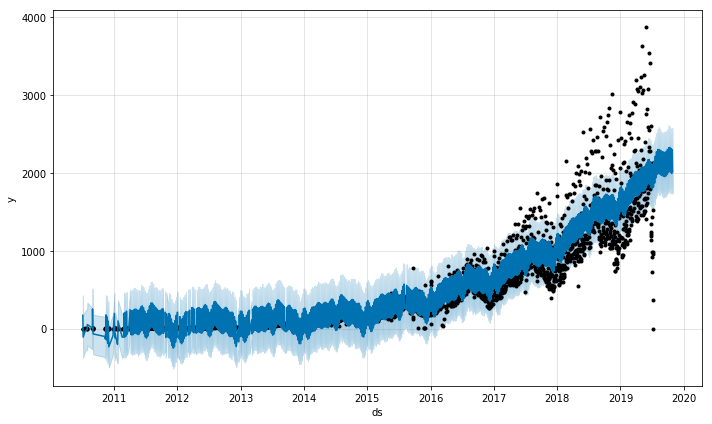

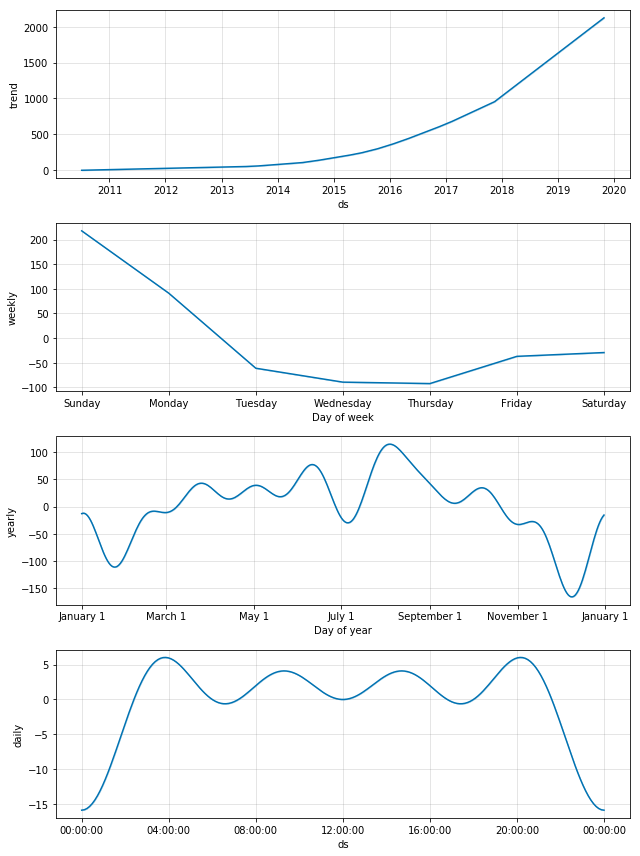

In [28]:
fcst = create_daily_forecast(df_prophet,
#                              cap,
                             holidays,
                             growth,
                             n_changepoints,
                             changepoint_prior_scale,
                             changepoints, 
                             holidays_prior_scale,
                             interval_width,
                             mcmc_samples,
                             future_num_points, 
                             daily_seasonality)

In [29]:
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return

print_error_metrics(y_true = df_prophet['y'], y_pred = fcst['yhat'])

MAPE: 527.438628
MPE: 3.745981
MAE: 12494.236623
RMSE: 204.572525
